In [1]:
import numpy as np

In [2]:
np.random.seed(42)

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

In [3]:
bernuolli = np.random.choice([0,1],size=(1000,100), p=[0.95,0.05])

# sums of all tests
test_sums = bernuolli.sum(axis=1)

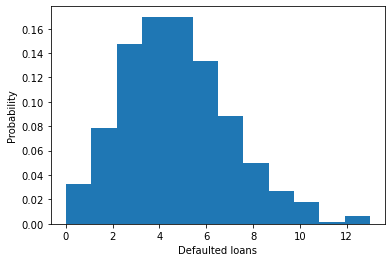

In [4]:
import matplotlib.pyplot as plt

plt.hist(test_sums,density=True,bins=12)
plt.xlabel('Defaulted loans')
plt.ylabel('Probability');

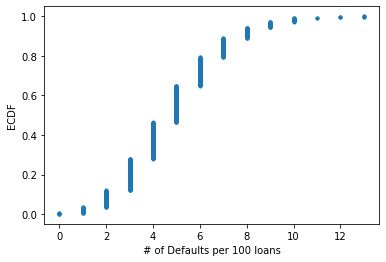

In [16]:
# Compute ECDF: x, y
x=np.sort(test_sums)
y=np.arange(1,len(x)+1)/len(x)
# Plot the ECDF with labeled axes
plt.plot(x,y,marker='.',linestyle='none')

plt.xlabel('# of Defaults per 100 loans')
plt.ylabel('ECDF')

# Show the plot
plt.show()

In [19]:
test_sums.mean()

4.871

In [20]:
(test_sums>=10).mean()

0.028

In [5]:
#other way

In [6]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number=np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number<p:
            n_success+=1

    return n_success

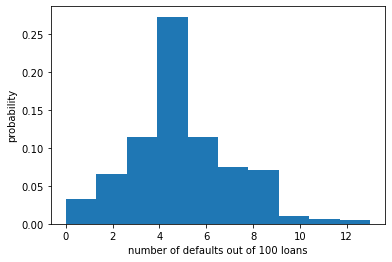

In [7]:
# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
plt.hist(n_defaults, density=True)
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('probability')

# Show the plot
plt.show()


### Will the bank fail?

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

### ECDF

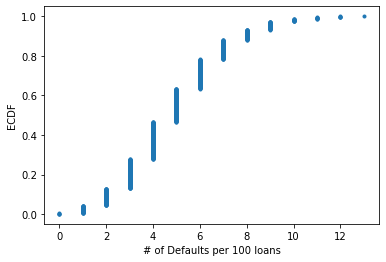

In [8]:
# Compute ECDF: x, y
x=np.sort(n_defaults)
y=np.arange(1,len(x)+1)/len(x)
# Plot the ECDF with labeled axes
plt.plot(x,y,marker='.',linestyle='none')

plt.xlabel('# of Defaults per 100 loans')
plt.ylabel('ECDF')

# Show the plot
plt.show()

In [15]:
n_defaults.mean()

4.901

In [11]:
# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
(n_defaults>=10).mean()

0.027

In [14]:
f'Probability of losing money is {(n_defaults>=10).mean()*100}%'

'Probability of losing money is 2.7%'

> As we might expect, we most likely get 5/100 defaults. We still have a 2% change of getting 10 or more defaults out of 100 loans.

## Bootstrapping, Confidence Intervals, Hypothesis Testing

Writing another function, draw_bs_reps(data, func, size=1), which generates many bootstrap replicates from the data set. This function will come in handy for you again and again as you compute confidence intervals and later when you do hypothesis tests.

In [2]:
def bootstrap_replicate_1d(data, func):
    ###"""Generate bootstrap replicate of 1D data."""    
    bs_sample = np.random.choice(data, len(data))
    
    return func(bs_sample)

In [3]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

> ### Paired Bootstrap

In [10]:
#for a linear regression

In [ ]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

## Hypothesis Testing
>**Permutation**: Permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test,

In [12]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [14]:
rain_june= np.array([ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])

In [15]:
rain_november=np.array([ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8])


To help see how permutation sampling works, in this exercise we will generate permutation samples and look at them graphically.

We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in June (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

In [16]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

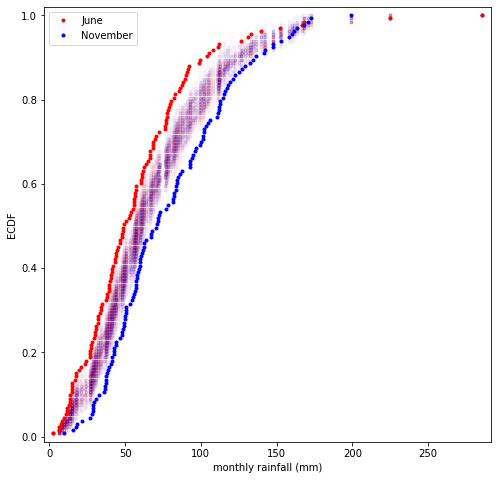

In [23]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8,8))

for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june,rain_november)


    # Compute ECDFs
    x_1, y_1 =  ecdf(perm_sample_1)
    x_2, y_2 =  ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red',label='June')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue',label='November')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.legend()
plt.show()

> Notice that the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the **observed data**, suggesting that the hypothesis is not commensurate with the data. June and November rainfall are not identically distributed.

In [24]:
#Generating permutation replicates

In [26]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

### Case Study

For your first foray into the Darwin finch data, you will study how the beak depth (the distance, top to bottom, of a closed beak) of the finch species Geospiza scandens has changed over time. The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, Geospiza fortis. These effects can lead to changes in the species over time.

In the next few problems, you will look at the beak depth of G. scandens on Daphne Major in 1975 and in 2012. To start with, let's plot all of the beak depth measurements in 1975 and 2012 in a bee swarm plot.

The data are stored in a pandas DataFrame called df with columns 'year' and 'beak_depth'. The units of beak depth are millimeters (mm).

In [28]:
years= np.array([1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
       1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
       1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
       1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
       1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
       1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
       1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
       1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012])

In [29]:
beak_depth=np.array([ 8.4 ,  8.8 ,  8.4 ,  8.  ,  7.9 ,  8.9 ,  8.6 ,  8.5 ,  8.9 ,
        9.1 ,  8.6 ,  9.8 ,  8.2 ,  9.  ,  9.7 ,  8.6 ,  8.2 ,  9.  ,
        8.4 ,  8.6 ,  8.9 ,  9.1 ,  8.3 ,  8.7 ,  9.6 ,  8.5 ,  9.1 ,
        9.  ,  9.2 ,  9.9 ,  8.6 ,  9.2 ,  8.4 ,  8.9 ,  8.5 , 10.4 ,
        9.6 ,  9.1 ,  9.3 ,  9.3 ,  8.8 ,  8.3 ,  8.8 ,  9.1 , 10.1 ,
        8.9 ,  9.2 ,  8.5 , 10.2 , 10.1 ,  9.2 ,  9.7 ,  9.1 ,  8.5 ,
        8.2 ,  9.  ,  9.3 ,  8.  ,  9.1 ,  8.1 ,  8.3 ,  8.7 ,  8.8 ,
        8.6 ,  8.7 ,  8.  ,  8.8 ,  9.  ,  9.1 ,  9.74,  9.1 ,  9.8 ,
       10.4 ,  8.3 ,  9.44,  9.04,  9.  ,  9.05,  9.65,  9.45,  8.65,
        9.45,  9.45,  9.05,  8.75,  9.45,  8.35,  9.4 ,  8.9 ,  9.5 ,
       11.  ,  8.7 ,  8.4 ,  9.1 ,  8.7 , 10.2 ,  9.6 ,  8.85,  8.8 ,
        9.5 ,  9.2 ,  9.  ,  9.8 ,  9.3 ,  9.  , 10.2 ,  7.7 ,  9.  ,
        9.5 ,  9.4 ,  8.  ,  8.9 ,  9.4 ,  9.5 ,  8.  , 10.  ,  8.95,
        8.2 ,  8.8 ,  9.2 ,  9.4 ,  9.5 ,  8.1 ,  9.5 ,  8.4 ,  9.3 ,
        9.3 ,  9.6 ,  9.2 , 10.  ,  8.9 , 10.5 ,  8.9 ,  8.6 ,  8.8 ,
        9.15,  9.5 ,  9.1 , 10.2 ,  8.4 , 10.  , 10.2 ,  9.3 , 10.8 ,
        8.3 ,  7.8 ,  9.8 ,  7.9 ,  8.9 ,  7.7 ,  8.9 ,  9.4 ,  9.4 ,
        8.5 ,  8.5 ,  9.6 , 10.2 ,  8.8 ,  9.5 ,  9.3 ,  9.  ,  9.2 ,
        8.7 ,  9.  ,  9.1 ,  8.7 ,  9.4 ,  9.8 ,  8.6 , 10.6 ,  9.  ,
        9.5 ,  8.1 ,  9.3 ,  9.6 ,  8.5 ,  8.2 ,  8.  ,  9.5 ,  9.7 ,
        9.9 ,  9.1 ,  9.5 ,  9.8 ,  8.4 ,  8.3 ,  9.6 ,  9.4 , 10.  ,
        8.9 ,  9.1 ,  9.8 ,  9.3 ,  9.9 ,  8.9 ,  8.5 , 10.6 ,  9.3 ,
        8.9 ,  8.9 ,  9.7 ,  9.8 , 10.5 ,  8.4 , 10.  ,  9.  ,  8.7 ,
        8.8 ,  8.4 ,  9.3 ,  9.8 ,  8.9 ,  9.8 ,  9.1 ])

In [31]:
import pandas as pd

In [35]:
df=pd.DataFrame({'beak_depth': beak_depth,'year': years})

### EDA

> Bee Swarmplot

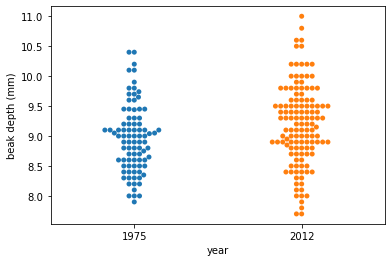

In [43]:
import seaborn as sns

sns.swarmplot('year','beak_depth',data=df)
plt.xlabel('year')
plt.ylabel('beak depth (mm)');


> It is kind of hard to see if there is a clear difference between the 1975 and 2012 data set. Eyeballing it, it appears as though the mean of the 2012 data set might be slightly higher, and it might have a bigger variance.

> ECDF

In [46]:
df.query('year==1975').beak_depth

0     8.40
1     8.80
2     8.40
3     8.00
4     7.90
      ... 
82    9.45
83    9.05
84    8.75
85    9.45
86    8.35
Name: beak_depth, Length: 87, dtype: float64

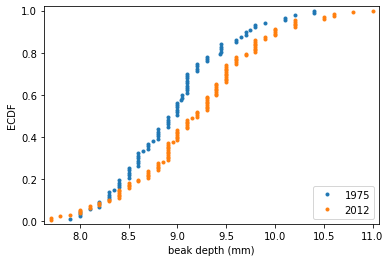

In [49]:
# Compute ECDFs
x_1975, y_1975 = ecdf(df.query('year==1975').beak_depth)
x_2012, y_2012 = ecdf(df.query('year==2012').beak_depth)

#PLOT
plt.plot(x_1975, y_1975, marker='.', linestyle='none')
plt.plot(x_2012, y_2012, marker='.', linestyle='none')

plt.margins(0.02)

plt.xlabel('beak depth (mm)')
plt.ylabel('ECDF')
plt.legend(('1975', '2012'), loc='lower right')

> The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.

### Parameter estimates of beak depths

Estimate the difference of the mean beak depth of the G. scandens samples from 1975 and 2012 and report a 95% confidence interval.

In [59]:
obs_diff=df.query('year==2012').beak_depth.mean()-df.query('year==1975').beak_depth.mean()
obs_diff

0.2262204724409429

We will take 10,000 bootstrap replicates of the mean for the 1975 beak depths using **draw_bs_reps()** function. Also get 10,000 bootstrap replicates of the mean for the 2012 beak depths.

In [138]:
bd_1975=df.query('year==1975').beak_depth.copy()
bd_2012=df.query('year==2012').beak_depth.copy().reset_index(drop=True)

In [54]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012)-np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975,np.mean,size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012,np.mean,size=10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates,[2.5,97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.2262204724409429 mm
95% confidence interval = [0.05885003 0.39046344] mm


### Hypothesis test: Are beaks deeper in 2012?

Your plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of G. scandens on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? 

> What is the probability that we would get the observed difference in mean beak depth if the means were the same?

In [55]:
null_values=np.random.normal(0,bs_diff_replicates.std(),bs_diff_replicates.size)

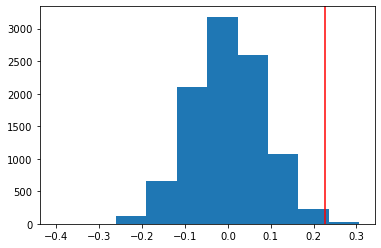

In [60]:
plt.hist(null_values)
plt.axvline(obs_diff,color='red');

In [61]:
# compute p value
(null_values > obs_diff).mean()

0.0031

> Significant difference

In [62]:
#other way:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value: p
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.0035


We get a p-value of 0.0034, which suggests that there is a statistically significant difference. But remember: it is very important to know how different they are! In the previous exercise, we got a difference of 0.2 mm between the means. You should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.

### What about the relationship between beak length and depth?

In [92]:
beak_length=np.array([13.9 , 14.  , 12.9 , 13.5 , 12.9 , 14.6 , 13.  , 14.2 , 14.  ,
       14.2 , 13.1 , 15.1 , 13.5 , 14.4 , 14.9 , 12.9 , 13.  , 14.9 ,
       14.  , 13.8 , 13.  , 14.75, 13.7 , 13.8 , 14.  , 14.6 , 15.2 ,
       13.5 , 15.1 , 15.  , 12.8 , 14.9 , 15.3 , 13.4 , 14.2 , 15.1 ,
       15.1 , 14.  , 13.6 , 14.  , 14.  , 13.9 , 14.  , 14.9 , 15.6 ,
       13.8 , 14.4 , 12.8 , 14.2 , 13.4 , 14.  , 14.8 , 14.2 , 13.5 ,
       13.4 , 14.6 , 13.5 , 13.7 , 13.9 , 13.1 , 13.4 , 13.8 , 13.6 ,
       14.  , 13.5 , 12.8 , 14.  , 13.4 , 14.9 , 15.54, 14.63, 14.73,
       15.73, 14.83, 15.94, 15.14, 14.23, 14.15, 14.35, 14.95, 13.95,
       14.05, 14.55, 14.05, 14.45, 15.05, 13.25, 14.3 , 12.5 , 13.7 ,
       13.8 , 12.  , 13.  , 13.  , 13.6 , 12.8 , 13.6 , 12.95, 13.1 ,
       13.4 , 13.9 , 12.3 , 14.  , 12.5 , 12.3 , 13.9 , 13.1 , 12.5 ,
       13.9 , 13.7 , 12.  , 14.4 , 13.5 , 13.8 , 13.  , 14.9 , 12.5 ,
       12.3 , 12.8 , 13.4 , 13.8 , 13.5 , 13.5 , 13.4 , 12.3 , 14.35,
       13.2 , 13.8 , 14.6 , 14.3 , 13.8 , 13.6 , 12.9 , 13.  , 13.5 ,
       13.2 , 13.7 , 13.1 , 13.2 , 12.6 , 13.  , 13.9 , 13.2 , 15.  ,
       13.37, 11.4 , 13.8 , 13.  , 13.  , 13.1 , 12.8 , 13.3 , 13.5 ,
       12.4 , 13.1 , 14.  , 13.5 , 11.8 , 13.7 , 13.2 , 12.2 , 13.  ,
       13.1 , 14.7 , 13.7 , 13.5 , 13.3 , 14.1 , 12.5 , 13.7 , 14.6 ,
       14.1 , 12.9 , 13.9 , 13.4 , 13.  , 12.7 , 12.1 , 14.  , 14.9 ,
       13.9 , 12.9 , 14.6 , 14.  , 13.  , 12.7 , 14.  , 14.1 , 14.1 ,
       13.  , 13.5 , 13.4 , 13.9 , 13.1 , 12.9 , 14.  , 14.  , 14.1 ,
       14.7 , 13.4 , 13.8 , 13.4 , 13.8 , 12.4 , 14.1 , 12.9 , 13.9 ,
       14.3 , 13.2 , 14.2 , 13.  , 14.6 , 13.1 , 15.2 ])

In [93]:
df=pd.DataFrame({'beak_depth': beak_depth,'beak_length':beak_length,'year': years})

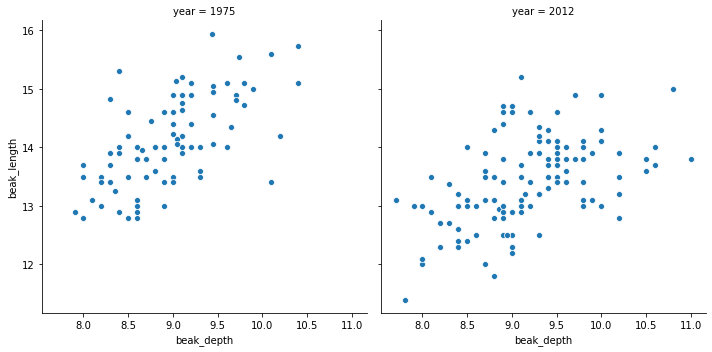

In [94]:
sns.relplot(x='beak_depth',y='beak_length',data=df,kind='scatter',col='year');

In [135]:
bl_1975=df.query('year==1975').beak_length.copy()
bl_2012=df.query('year==2012').beak_length.copy().reset_index(drop=True)

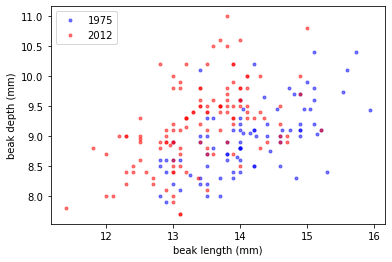

In [97]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='None', alpha=0.5, color='blue')

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
            linestyle='None', alpha=0.5, color='red')

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

Looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

### Linear regressions

Linear regression for both the 1975 and 2012 data. Then, perform pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression line.

We will use the draw_bs_pairs_linreg() function that I wrote back

In [105]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

In [140]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975,bd_1975,1)
slope_2012, intercept_2012 = np.polyfit(bl_2012,bd_2012,1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975,bd_1975,size=1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012,bd_2012,size=1000)


# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975,[2.5,97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012,[2.5,97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975,[2.5,97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012,[2.5,97.5])



# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 conf int = [0.331248   0.59684491]
1975: intercept = 2.3908752365842263 conf int = [0.5937861  4.23904308]
2012: slope = 0.462630358835313 conf int = [0.34362175 0.60061156]
2012: intercept = 2.9772474982360198 conf int = [1.11846384 4.59874838]


Display your linear regression results on the scatter plot, the code for which is already pre-written for you from your previous exercise. To do this, take the first 100 bootstrap samples

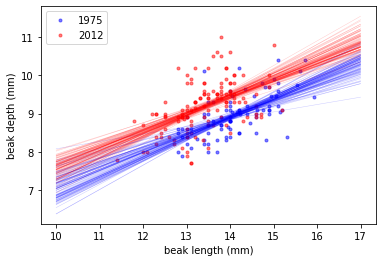

In [148]:
# Make scatter plot of 1975 data
plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')

# Plot the bootstrap lines
x = np.array([10, 17])

for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i]*x+bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i]*x+bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red');

### Beak length to depth ratio

The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth. Let's make that comparison.

In [151]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975/bd_1975
ratio_2012 = bl_2012/bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975,np.mean,size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012,np.mean,size=10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975,[0.5,99.5])
conf_int_2012 = np.percentile(bs_replicates_2012,[0.5,99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 conf int = [1.55703293 1.6003811 ]
2012: mean ratio = 1.4658342276847778 conf int = [1.44331664 1.48836438]


The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.

In [171]:
###useful functions

In [173]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]
